In [16]:
import os
from ctypes import *

import numpy as np
import time
from PIL import Image
from matplotlib import pyplot as plt

In [17]:
path_to_dll = "C:/Users/gautier/CLionProjects/MLP_Rattrapage/cmake-build-debug/libMLP3.dll"
mylib = cdll.LoadLibrary(path_to_dll)

In [18]:
X_train = []
Y_train = []
X_test = []
Y_test = []

def import_images_and_assign_labels(folder, label, type):
    showed = False
    for file in os.listdir(folder):
        image_path = folder + file
        im = Image.open(image_path)
        im = im.resize((32,32))
        im = im.convert("RGB")
        im_arr = np.array(im)
        im_arr = np.reshape(im_arr, (32 * 32 * 3))
        if (type == "train"):
            X_train.append(im_arr)
            Y_train.append(label)
        else:
            X_test.append(im_arr)
            Y_test.append(label)

def import_dataset():
    dataset_folder = "C:/Users/gautier/CLionProjects/MLP_Rattrapage/Datasets"
    train_folder = dataset_folder + "/train"
    test_folder = dataset_folder + "/test"
    import_images_and_assign_labels(train_folder + "/basque_flag/", [1, -1, -1], "train")
    import_images_and_assign_labels(train_folder + "/belgium_flag/", [-1, 1, -1], "train")
    import_images_and_assign_labels(train_folder + "/french_flag/", [-1, -1, 1], "train")
    import_images_and_assign_labels(test_folder + "/basque_flag/", [1, -1, -1], "test")
    import_images_and_assign_labels(test_folder + "/belgium_flag/", [-1, 1, -1], "test")
    import_images_and_assign_labels(test_folder + "/french_flag/", [-1, -1, 1], "test")
    return (np.array(X_train) / 255.0, np.array(Y_train)), (np.array(X_test) / 255.0, np.array(Y_test))


In [19]:
def run_train():
    (X_train, Y_train), (X_test, Y_test) = import_dataset()
    dataset_inputs = np.array(X_train)
    dataset_expected_outputs = np.array(Y_train)
    init_tab = [2, 3]
    #init_tab = [2, 8, 3]
    #init_tab = [2, 32, 3]
    #init_tab = [2, 32, 32, 3]
    init_size = len(init_tab)
    init_type = c_int * init_size
    init = init_type(*init_tab)
    mylib.create_mlp_model.argtypes = [init_type, c_int]
    mylib.create_mlp_model.restype = c_void_p
    model = mylib.create_mlp_model(init, int(init_size))
    img_test = X_test
    mylib.getXSize.argtypes = [c_void_p]
    mylib.getXSize.restype = c_int
    tmp_len = mylib.getXSize(model)

    flattened_dataset_inputs = []
    for p in dataset_inputs :
        flattened_dataset_inputs.append(p[0])
        flattened_dataset_inputs.append(p[1])    
    flattened_dataset_outputs = []
    for p in dataset_expected_outputs:
        flattened_dataset_outputs.append(p[0])
        flattened_dataset_outputs.append(p[1])
        flattened_dataset_outputs.append(p[2])

    arrsize_flat = len(flattened_dataset_inputs)
    arrtype_flat = c_float * arrsize_flat
    arr_flat = arrtype_flat(*flattened_dataset_inputs)
    arrsize_exp = len(flattened_dataset_outputs)
    arrtype_exp = c_float * arrsize_exp
    arr_exp = arrtype_exp(*flattened_dataset_outputs)
    mylib.train_classification_stochastic_gradient_backpropagation_mlp_model.argtypes = [c_void_p, arrtype_flat, c_int,
                                                                                         arrtype_exp, c_float, c_int]
    mylib.train_classification_stochastic_gradient_backpropagation_mlp_model.restype = None
    mylib.train_classification_stochastic_gradient_backpropagation_mlp_model(model, arr_flat, arrsize_flat, arr_exp,
                                                                             0.0001, 1000000)
    
    predicted_outputs = []
    i = 0
    correct = 0
    for p in img_test :
        arrsizeP = len(p)
        arrtypeP = c_float * arrsizeP
        arrP = arrtypeP(*p)
        mylib.predict_mlp_model_classification.argtypes = [c_void_p, arrtypeP]
        mylib.predict_mlp_model_classification.restype = POINTER(c_float)
        tmp = mylib.predict_mlp_model_classification(model, arrP)
        np_arr = np.ctypeslib.as_array(tmp, (tmp_len,))
        predicted_outputs.append(np_arr)
        if predicted_outputs[i][0] > predicted_outputs[i][1] and predicted_outputs[i][0] > predicted_outputs[i][2]:
            if (np.array_equal(Y_test[i], [1, -1, -1])):
                correct += 1
            print(i, " - Basque flag")
        elif predicted_outputs[i][1] > predicted_outputs[i][0] and predicted_outputs[i][1] > predicted_outputs[i][2]:
            if (np.array_equal(Y_test[i], [-1, 1, -1])):
                correct += 1
            print(i, " - Belgium flag")
        else :
            if (np.array_equal(Y_test[i], [-1, -1, 1])):
                correct += 1
            print(i, " - French flag")
        i += 1
    accs = [0, correct / i]
    plt.plot(accs)
    plt.legend(['accuracy'], loc='upper left')
    plt.title('Evolution of accuracy')
    plt.xlabel('epochs')
    plt.ylabel(f'accuracy')
    plt.show()

0  - Basque flag
1  - Basque flag
2  - Belgium flag
3  - Basque flag
4  - Basque flag
5  - Basque flag
6  - Basque flag
7  - Basque flag
8  - Basque flag
9  - Belgium flag
10  - Belgium flag
11  - Basque flag
12  - Basque flag
13  - Belgium flag
14  - Basque flag
15  - Belgium flag
16  - Basque flag
17  - Basque flag
18  - Basque flag
19  - Basque flag
20  - Basque flag
21  - Basque flag
22  - Basque flag
23  - Basque flag
24  - Basque flag
25  - Basque flag
26  - Basque flag
27  - Basque flag
28  - Belgium flag
29  - Basque flag
30  - Basque flag
31  - Basque flag
32  - Basque flag
33  - Basque flag
34  - Basque flag
35  - Basque flag
36  - Basque flag
37  - Basque flag
38  - Basque flag
39  - Basque flag
40  - Basque flag
41  - Basque flag
42  - Basque flag
43  - Basque flag
44  - Basque flag
45  - Belgium flag
46  - Basque flag
47  - Belgium flag
48  - Basque flag
49  - Belgium flag
50  - Belgium flag
51  - Basque flag
52  - Basque flag
53  - Basque flag
54  - Basque flag
55  - Basq

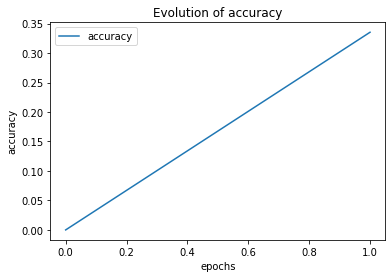

In [20]:
if __name__ == "__main__":
    run_train()